In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from models.cnn import SimpleCNN, LeNet
from models.mlp import MLP
import numpy as np
import matplotlib.pyplot as plt

In [3]:
in_channels = 1
num_classes = 10
num_conv_layers = 2
temperature = 1
num_epochs = 10
batch_size = 64
lr = 0.001
save_path_folder = 'saved_models/model'

In [4]:
# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
for i, (images, labels) in enumerate(train_loader):
    print(images[0].squeeze().shape)

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([2

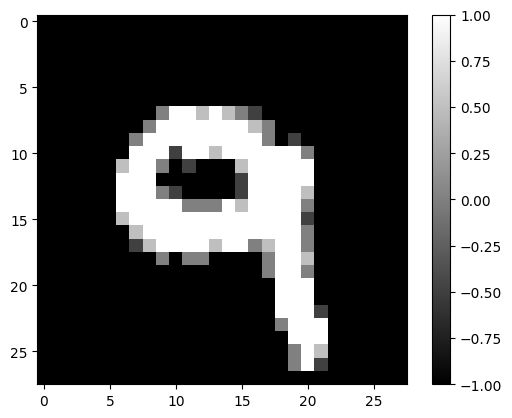

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_tensor_as_image(tensor):
    # Assuming the input tensor is a square matrix
    if len(tensor.shape) != 2 or tensor.shape[0] != tensor.shape[1]:
        raise ValueError("Input tensor must be a square matrix.")

    plt.imshow(tensor, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Example usage
# Replace this with your actual square tensor
your_square_tensor = images[0].squeeze()

visualize_tensor_as_image(your_square_tensor)

In [76]:
def visualize_tensor_as_image(tensor):
    # Assuming the input tensor is a square matrix
    if len(tensor.shape) != 2 or tensor.shape[0] != tensor.shape[1]:
        raise ValueError("Input tensor must be a square matrix.")

    plt.imshow(tensor, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

def shift_not_preserving_shape(img, direction : str, max_shift: int):
    shift = np.random.randint(low=1, high= max_shift+1)
    visualize_tensor_as_image(img)
    if direction == "u":
        img = torch.roll(img, -shift, 0)
        img[-shift:,:] = torch.full(img[-shift:,:].shape, -1)
    elif direction == "d":
        img = torch.roll(img, shift, 0)
        img[:shift,:] = torch.full(img[:shift,:].shape, -1)
    elif direction == "l":
        img = torch.roll(img, -shift, 1)
        img[:,-shift:] = torch.full(img[:,-shift:].shape, -1)
    elif direction == "r":
        img = torch.roll(img, shift, 1)
        img[:,:shift] = torch.full(img[:,:shift].shape, -1)
    else:
        raise ValueError("wrong value passed")
    visualize_tensor_as_image(img)
    return img

def shift_preserving_shape(img, direction : str, max_shift: int):
    shift = np.random.randint(low=1, high= max_shift+1)
    shift = max_shift
    visualize_tensor_as_image(img)
    row_length = img.shape[1]
    col_length = img.shape[0]
    if direction == "u":
        while shift > 0 and torch.sum(img[:shift, :]) != -1 * shift * col_length:
            shift = shift - 1
        if shift == 0:
            print("Image could not be shifted.")
            return
        print(shift)
        img = torch.roll(img, -shift, 0)
    elif direction == "d":
        while shift > 0 and torch.sum(img[-shift:, :]) != -1 * shift * col_length:
            shift = shift - 1
        if shift == 0:
            print("Image could not be shifted.")
            return
        print(shift)
        img = torch.roll(img, shift, 0)
    elif direction == "l":
        while shift > 0 and torch.sum(img[:, :shift]) != -1 * row_length * shift:
            shift = shift - 1
        if shift == 0:
            print("Image could not be shifted.")
            return
        print(shift)
        img = torch.roll(img, -shift, 1)
    elif direction == "r":
        while shift > 0 and torch.sum(img[:, -shift:]) != -1 * row_length * shift:
            shift = shift - 1
        if shift == 0:
            print("Image could not be shifted.")
            return
        print(shift)
        img = torch.roll(img, shift, 1)
    else:
        raise ValueError("wrong value passed")
    visualize_tensor_as_image(img)
    return img


In [85]:
def invariance_measure(labels_normal, labels_shifted):

    #normalize tensors
    if not torch.isclose(labels_normal,torch.Tensor([1])):
        labels_normal = torch.softmax(labels_normal, dim=1) #batch classes
    if not torch.isclose(labels_shifted, torch.Tensor([1])):
        labels_shifted = torch.softmax(labels_shifted, dim=1) #batch classes
    
    return torch.sum(torch.norm(labels_normal - labels_shifted, dim=1), dim=0)

In [84]:

if torch.isclose(torch.Tensor([1]),1):
    print("q")

TypeError: isclose(): argument 'other' (position 2) must be Tensor, not int